In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [2]:
data=pd.read_csv('files_for_lab/customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#extract column names+
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#check data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#see unique values for each column
for col in data.columns:
    print(col, data[col].unique())


customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:

#encode churn column 
data['Churn'] = data['Churn'].astype('category').cat.codes

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
#split data into X and y
X = data[['tenure','SeniorCitizen', 'MonthlyCharges']]
y=data['Churn']



In [11]:
#value counts for x.seniors
X['SeniorCitizen'].value_counts()


0    5901
1    1142
Name: SeniorCitizen, dtype: int64

class senior citizens are imbalanced

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
y_train.isna().sum()
y_test.isna().sum()

0

In [14]:
#scale x and y
scaler = StandardScaler()
scaler.fit(X_train) 

X_train_scaled_np = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)


X_test_scaled_np = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
146,-1.191371,-0.440912,-1.503140
197,1.093864,-0.440912,1.541386
2565,-0.783293,-0.440912,-1.323953
5613,1.624364,-0.440912,0.184208
5599,-0.946524,-0.440912,0.993869


In [15]:
#build regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
#predict
y_pred = model.predict(X_test_scaled)

evaluate model

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, f1_score, precision_score,ConfusionMatrixDisplay


In [17]:

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))

The accuracy in the TEST set is: 0.80
The precision in the TEST set is: 0.68
The recall in the TEST set is: 0.42


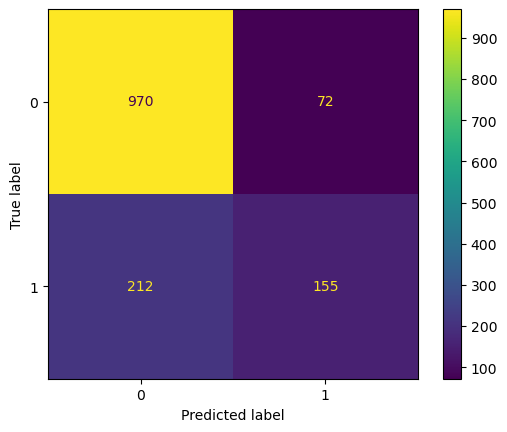

In [18]:

cm_test = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot()
plt.show()

now we use SMOTE to balance classesand see if it improves our model

In [19]:
import imblearn

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
#chose smote as oversampling method and use 3 nearest neighbors
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [22]:
print(X_train.shape)
print(X_train_SMOTE.shape)
y_train_SMOTE.value_counts()

(5634, 3)
(8264, 3)


0    4132
1    4132
Name: Churn, dtype: int64

In [23]:
#now we have balanced classes, we try to fit the model again
model = LogisticRegression()
model= LogisticRegression(max_iter=1000)
model.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = model.predict(X_test_scaled)


In [24]:
#evaluate model performance
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))


The accuracy in the TEST set is: 0.74
The precision in the TEST set is: 0.50
The recall in the TEST set is: 0.70


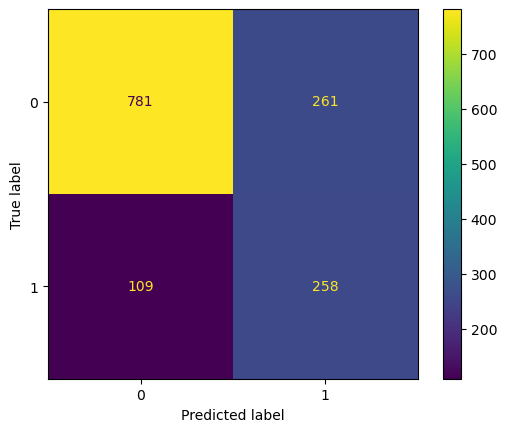

In [25]:
#confusion matrix
cm_test = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot()
plt.show()

we had less false negatives than previously recorded before applying a smote analysis. 